#Load packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install bokeh
from bokeh.plotting import figure, output_file, show
!pip install sklearn
!pip install IPython
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus
!apt-get install graphviz
!pip install seaborn
import seaborn as sns

    100% |████████████████████████████████| 16.2MB 3.1MB/s 
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/1a/a0/ec/d46994ac427b4879969dd780cf422bd3a0886fb85f481dd064
Successfully built bokeh
  Running setup.py bdist_wheel for sklearn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
    100% |████████████████████████████████| 286kB 7.6MB/s 
  Running setup.py bdist_wheel for pydotplus ... - \ done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libg

#Import Data

source: https://www.kaggle.com/paololol/league-of-legends-ranked-matches

In [0]:
#champs = pd.read_csv('champs.csv')
#matches = pd.read_csv('matches.csv')
participants = pd.read_csv('participants.csv')
stats1 = pd.read_csv('stats1.csv')
stats2 = pd.read_csv('stats2.csv')
#teambans = pd.read_csv('teambans.csv')
#teamstats = pd.read_csv('teamstats.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Organizing data

In [0]:
stats = pd.concat([stats1, stats2])
mlset = stats.merge(participants, how = 'inner', on = 'id')
mlset['Roles'] = mlset['role'] + mlset['position']
mlset['Roles'] = mlset['Roles'].replace(to_replace = 'NONEJUNGLE', value = 'Jungle')
mlset['Roles'] = mlset['Roles'].replace(to_replace = 'DUO_SUPPORTBOT', value = 'Support')
mlset['Roles'] = mlset['Roles'].replace(to_replace = 'DUO_CARRYBOT', value = 'ADC')
mlset['Roles'] = mlset['Roles'].replace(to_replace = 'SOLOTOP', value = 'Top')
mlset['Roles'] = mlset['Roles'].replace(to_replace = 'SOLOMID', value = 'Mid')

In [0]:
ADC = mlset[mlset.Roles == 'ADC']
Jungle = mlset[mlset.Roles == 'Jungle']
Mid = mlset[mlset.Roles == 'Mid']
Support = mlset[mlset.Roles == 'Support']
Top = mlset[mlset.Roles == 'Top']

In [0]:
All = ADC.append(Jungle).append(Support).append(Mid).append(Top)
All.reset_index()
All.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754228 entries, 2 to 1834516
Data columns (total 64 columns):
id                        int64
win                       int64
item1                     int64
item2                     int64
item3                     int64
item4                     int64
item5                     int64
item6                     int64
trinket                   int64
kills                     int64
deaths                    int64
assists                   int64
largestkillingspree       int64
largestmultikill          int64
killingsprees             int64
longesttimespentliving    int64
doublekills               int64
triplekills               int64
quadrakills               int64
pentakills                int64
legendarykills            int64
totdmgdealt               int64
magicdmgdealt             int64
physicaldmgdealt          int64
truedmgdealt              int64
largestcrit               int64
totdmgtochamp             int64
magicdmgtochamp        

#SGD Classifier Tests

Included Variables: Items, trinket, kills, assists, minions, champion, summoner spells

Accuracy: 0.489

In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
clf = linear_model.SGDClassifier()
clf.fit(X_train, np.ravel(Y_train))
test = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.489154785860463


Included Variables: Kills, assists, minions, champion, summoner spells

Accuracy: 0.564

In [0]:
MLData = All.loc[:, ['kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2',]]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
clf = linear_model.SGDClassifier()
clf.fit(X_train, np.ravel(Y_train))
test = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5637402165052473


#Logistic Regression Classifier Test

Included Variables: Kills, assists, minions, champion, summoner spells

Accuracy: 0.726

In [0]:
MLData = All.loc[:, ['kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2',]]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, np.ravel(Y_train))
test = logreg.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

0.7261989590874629


#K Nearest Neighbors Classifier Test

In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
for k in range(49):
  knn = KNeighborsClassifier(n_neighbors = k + 1)
  knn.fit(X_train, np.ravel(Y_train))
  test = knn.predict(X_test)
  print(k + 1, ' neighbors: ', metrics.accuracy_score(Y_test, test))

Accuracy Results:

1  neighbors:  0.8097370356224668

2  neighbors:  0.7984015779002753

3  neighbors:  0.8148760424801765

4  neighbors:  0.817273105579086

5  neighbors:  0.8173016081129613

6  neighbors:  0.816130153970688

7  neighbors:  0.8156171083609333

8  neighbors:  0.8143601466170343

9  neighbors:  0.812912217896171

10  neighbors:  0.8115013424693456

11  neighbors:  0.810030611721382

12  neighbors:  0.8087508479503828

13  neighbors:  0.8078672694002497

14  neighbors:  0.8068497289409029

15  neighbors:  0.8055585641563535

16  neighbors:  0.8044583663487684

17  neighbors:  0.8035006812105596

18  neighbors:  0.8021667626251974


Text(0.5,1,'Accuracy of Tested Models')

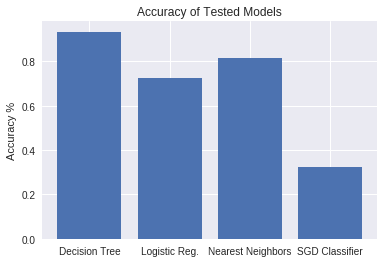

In [0]:
knn = [0.32363487114004436, 0.7261989590874629, 0.8173016081129613, 0.9343216111912349]
ns = ['SGD Classifier', 'Logistic Reg.', 'Nearest Neighbors',  'Decision Tree']
plt.bar(ns, knn)
plt.ylabel('Accuracy %')
plt.title('Accuracy of Tested Models')

#Decision Tree Classifier Tests:

In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, np.ravel(Y_train))
test = dtc.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

0.9305165229188875


In [0]:
MLData = All.loc[:, ['trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
dtc = DecisionTreeClassifier(class_weight = 'balanced')
dtc.fit(X_train, np.ravel(Y_train))
test = dtc.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

0.9343216111912349


In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for r in range(1, 11):
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = r)
  dtc = DecisionTreeClassifier()
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
  print('Test ', r, ':    ', metrics.accuracy_score(Y_test, test))

Test  1 :     0.9305307741858251
Test  2 :     0.9303882615164488
Test  3 :     0.9311350279039806
Test  4 :     0.9310837233430052
Test  5 :     0.9310324187820297
Test  6 :     0.9308785050991033
Test  7 :     0.9303141549283731
Test  8 :     0.9299322209744446
Test  9 :     0.9302942031546605
Test  10 :     0.930362609235961


In [0]:
MLData = All.loc[:, ['trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for r in range(1, 11):
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = r)
  dtc = DecisionTreeClassifier()
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
  print('Test ', r, ':    ', metrics.accuracy_score(Y_test, test))

Test  1 :     0.9337287584866295
Test  2 :     0.934002382811832
Test  3 :     0.9347862024934017
Test  4 :     0.9336689031654914
Test  5 :     0.9339881315448944
Test  6 :     0.9336232991112909
Test  7 :     0.9334722356817521
Test  8 :     0.9341306442142706
Test  9 :     0.9339653295177941
Test  10 :     0.9343786162589854


In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for r in range(1, 11):
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = r)
  dtc = DecisionTreeClassifier()
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
  print('Test ', r, ':    ', metrics.accuracy_score(Y_test, test))

Test  1 :     0.9312803908267445
Test  2 :     0.9311977334785062
Test  3 :     0.9316879770611607
Test  4 :     0.930844302058453
Test  5 :     0.9313658984283703
Test  6 :     0.9313487969080452
Test  7 :     0.9311920329717311
Test  8 :     0.9315084110977466
Test  9 :     0.9314571065367712
Test  10 :     0.9313288451343325


In [0]:
MLData = All.loc[:, ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for r in range(1, 11):
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = r)
  dtc = DecisionTreeClassifier(class_weight = 'balanced')
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
  print('Test ', r, ':    ', metrics.accuracy_score(Y_test, test))

Test  1 :     0.9308528528186156
Test  2 :     0.9301545407386717
Test  3 :     0.9311350279039806
Test  4 :     0.9307473934432771
Test  5 :     0.9314200532427332
Test  6 :     0.9311435786641432
Test  7 :     0.9306162817874509
Test  8 :     0.9301317387115715
Test  9 :     0.9305079721587249
Test  10 :     0.9307958477508651


In [0]:
MLData = All.loc[:, ['trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for r in range(1, 11):
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = r)
  dtc = DecisionTreeClassifier(class_weight = 'balanced')
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
  print('Test ', r, ':    ', metrics.accuracy_score(Y_test, test))

Test  1 :     0.9341448954812083
Test  2 :     0.9342104513091214
Test  3 :     0.9351966389812054
Test  4 :     0.9345638827291747
Test  5 :     0.9346778928646756
Test  6 :     0.934056537626195
Test  7 :     0.9337401595001795
Test  8 :     0.9350484258050541
Test  9 :     0.9342902584039721
Test  10 :     0.9346379893172503


In [0]:
dot_data = StringIO()
export_graphviz(dtc, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
All = All.loc[All['id'] <= 1800]
MLData = All.loc[:, ['trinket', 'kills', 'assists', 'totminionskilled', 'championid', 'ss1', 'ss2']]
MLClass = All.loc[:, ['Roles']]
for i in range(All['id'].min(), All['id'].max):
  
  X_train, X_test, Y_train, Y_test = train_test_split(MLData, MLClass, test_size = 0.2, random_state = 1)
  dtc = DecisionTreeClassifier(class_weight = 'balanced')
  dtc.fit(X_train, np.ravel(Y_train))
  test = dtc.predict(X_test)
print(metrics.accuracy_score(Y_test, test))

0.9040697674418605


In [0]:
tree.export_graphviz(dtc, out_file = None)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= 88.5\\ngini = 0.8\\nsamples = 118368\\nvalue = [23673.6, 23673.6, 23673.6, 23673.6, 23673.6]"] ;\n1 [label="X[6] <= 3.5\\ngini = 0.554\\nsamples = 46794\\nvalue = [301.541, 20734.362, 1231.385, 23212.548, 1212.319]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[5] <= 9.0\\ngini = 0.029\\nsamples = 10007\\nvalue = [4.203, 87.455, 50.687, 10297.87, 9.675]"] ;\n1 -> 2 ;\n3 [label="X[2] <= 0.5\\ngini = 0.022\\nsamples = 9957\\nvalue = [4.203, 51.332, 49.693, 10286.369, 9.675]"] ;\n2 -> 3 ;\n4 [label="X[0] <= 3340.5\\ngini = 0.643\\nsamples = 87\\nvalue = [0.0, 13.308, 26.834, 42.864, 4.838]"] ;\n3 -> 4 ;\n5 [label="X[3] <= 4.0\\ngini = 0.687\\nsamples = 66\\nvalue = [0.0, 13.308, 26.834, 20.909, 4.838]"] ;\n4 -> 5 ;\n6 [label="X[1] <= 0.5\\ngini = 0.423\\nsamples = 16\\nvalue = [0.0, 11.407, 1.988, 2.091, 0.0]"] ;\n5 -> 6 ;\n7 [label="X[6] <= 2.0\\ngini = 0.352\\nsamples = 15\\nvalue = [0.0, 11.407, 1.9

In [0]:
All['id'].min()

9

In [0]:
mlset2 = mlset[['championid', 'kills', 'deaths', 'assists']]
mlset2 = mlset2.merge(champs, how = 'outer', left_on = 'championid', right_on = 'id')


NameError: ignored

#Visualizing most common Summoner Spells by Role

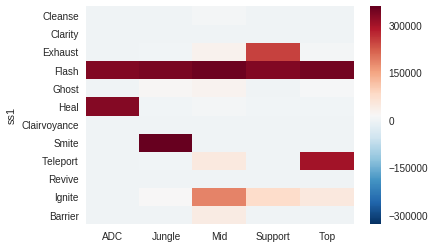

In [0]:
sns.heatmap(spells, center = )

In [0]:
spell1 = All.groupby(['ss1', 'Roles'], as_index = False)[['id']].count()
spell2 = All.groupby(['ss2', 'Roles'], as_index = False)[['id']].count()
spell1 = spell1.pivot(index = 'ss1', columns = 'Roles', values = 'id').fillna(0)
spell2 = spell2.pivot(index = 'ss2', columns = 'Roles', values = 'id').fillna(0)

In [0]:
spells = spell1 + spell2

In [0]:
spells.loc[1, 'ss1'] = 'Cleanse'
spells.loc[2, 'ss1'] = 'Clarity'
spells.loc[3, 'ss1'] = 'Exhaust'
spells.loc[4, 'ss1'] = 'Flash'
spells.loc[6, 'ss1'] = 'Ghost'
spells.loc[7, 'ss1'] = 'Heal'
spells.loc[10, 'ss1'] = 'Clairvoyance'
spells.loc[11, 'ss1'] = 'Smite'
spells.loc[12, 'ss1'] = 'Teleport'
spells.loc[13, 'ss1'] = 'Revive'
spells.loc[14, 'ss1'] = 'Ignite'
spells.loc[21, 'ss1'] = 'Barrier'
spells = spells[['ss1', 'ADC', 'Jungle', 'Mid', 'Support', 'Top']]
spells.reset_index(drop = True, inplace = True)

In [0]:
spells.set_index('ss1', drop = True)

Roles,ADC,Jungle,Mid,Support,Top
ss1,,,,,
Cleanse,191.0,185.0,7849.0,39.0,130.0
Clarity,0.0,3.0,0.0,2.0,1.0
Exhaust,648.0,3685.0,30218.0,250589.0,7773.0
Flash,333942.0,341270.0,350812.0,333135.0,345000.0
Ghost,175.0,19876.0,25952.0,337.0,11960.0
Heal,330611.0,2111.0,8944.0,3416.0,1855.0
Clairvoyance,0.0,0.0,3.0,0.0,0.0
Smite,139.0,358305.0,521.0,401.0,661.0
Teleport,541.0,3618.0,49483.0,995.0,303427.0


In [0]:
spells

Roles,ss1,ADC,Jungle,Mid,Support,Top
0,Cleanse,191.0,185.0,7849.0,39.0,130.0
1,Clarity,0.0,3.0,0.0,2.0,1.0
2,Exhaust,648.0,3685.0,30218.0,250589.0,7773.0
3,Flash,333942.0,341270.0,350812.0,333135.0,345000.0
4,Ghost,175.0,19876.0,25952.0,337.0,11960.0
5,Heal,330611.0,2111.0,8944.0,3416.0,1855.0
6,Clairvoyance,0.0,0.0,3.0,0.0,0.0
7,Smite,139.0,358305.0,521.0,401.0,661.0
8,Teleport,541.0,3618.0,49483.0,995.0,303427.0
9,Revive,0.0,1.0,6.0,4.0,2.0


In [0]:
spells = pd.DataFrame(spells, columns = ['ss1', 'ADC', 'Jungle', 'Mid', 'Support', 'Top'])

In [0]:
spells.set_index('ss1', drop = True, inplace = True)

#Finding Most common item by role

In [0]:
items = pd.concat([All[['Roles', 'item1']], All[['Roles', 'item2']], All[['Roles', 'item3']], All[['Roles', 'item4']], All[['Roles', 'item5']], All[['Roles', 'item6']]])

In [0]:
items.reset_index(drop = True, inplace = True)
items = items.fillna(0)
items['item'] = items['item1'] + items['item2'] + items['item3'] + items['item4'] + items['item5'] + items['item6']

In [0]:
items = items[items.item != 0]
items = items[['Roles', 'item']]

In [0]:
items.reset_index(drop = True, inplace = True)

In [0]:
ADC = items[items.Roles == 'ADC']
Support = items[items.Roles == 'Support']
Top = items[items.Roles == 'Top']
Mid = items[items.Roles == 'Mid']
Jungle = items[items.Roles == 'Jungle']

In [0]:
print('ADC', ADC['item'].mode())
print('Top', Top['item'].mode())
print('Mid', Mid['item'].mode())
print('Support', Support['item'].mode())
print('Jungle', Jungle['item'].mode())

ADC 0    3006.0
dtype: float64
Top 0    3047.0
dtype: float64
Mid 0    3020.0
dtype: float64
Support 0    3107.0
dtype: float64
Jungle 0    3047.0
dtype: float64
